# Importing the packages

In [1]:
!pip install imblearn
!pip install -U numpy scipy scikit-learn
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Libraries different ensemble classifiers
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)
from xgboost import XGBClassifier

import math

     |████████████████████████████████| 38.1 MB 1.2 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [51]:
# Load the dataset
dataframe = pd.read_csv('SBA_loans_project_2.csv')
dataframe

,City,State,Zip,Bank,BankState,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,MIS_Status
0,BRADLEY,WV,25818,CITY NATL BK OF W. VIRGINIA,WV,0,7,1.0,0,0,1,0,N,Y,"$30,000.00",$0.00,"$30,000.00","$27,000.00",P I F
1,LA JOLLA,CA,92037,U.S. BANK NATIONAL ASSOCIATION,OH,531210,1,2.0,0,1,0,1,Y,N,"$50,000.00",$0.00,"$50,000.00","$25,000.00",P I F
2,WINSLOW,AZ,86047,SOUTHWESTERN BUS. FINANCING CO,AZ,721110,30,1.0,0,1,10465,2,0,N,"$1,297,000.00",$0.00,"$1,300,000.00","$1,300,000.00",P I F
3,OXNARD,CA,93030,CITY NATIONAL BANK,CA,0,8,1.0,0,0,1,0,N,N,"$510,000.00",$0.00,"$510,000.00","$433,500.00",P I F
4,MERIDIAN,MS,39301,TRUSTMARK NATIONAL BANK,MS,0,4,2.0,0,0,1,0,N,N,"$87,000.00",$0.00,"$87,000.00","$78,300.00",P I F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809242,KENT,WA,98030,U.S. BANK NATIONAL ASSOCIATION,OH,812112,4,1.0,0,4,0,1,Y,N,"$28,938.00",$0.00,"$20,000.00","$10,000.00",P I F
809243,PROSPECT PARK,PA,19076,"TD BANK, NATIONAL ASSOCIATION",DE,811113,1,1.0,3,1,20550,2,0,N,"$150,000.00",$0.00,"$150,000.00","$127,500.00",P I F
809244,CASTLE ROCK,CO,80104,"COLORADO LENDING SOURCE, LTD.",CO,441310,5,1.0,10,5,1,1,N,N,"$142,000.00",$0.00,"$165,000.00","$165,000.00",P I F
809245,CHEEKTOWAGA (TOWN OF),NY,14227,BANK OF AMERICA NATL ASSOC,RI,445110,9,1.0,3,12,1,1,0,N,"$28,400.00",$0.00,"$28,400.00","$14,200.00",CHGOFF


In [52]:
dataframe.duplicated().sum()

812

In [53]:
# drop duplicates
dataframe = dataframe.drop_duplicates()

# Data Preprocessing

In [54]:
# some basic stats about the data
dataframe.describe()

,Zip,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural
count,808435.000000,808435.000000,808435.000000,808314.000000,808435.000000,808435.000000,808435.000000,808435.000000
mean,53808.598008,398779.951683,11.415145,1.280324,8.544307,10.912164,2749.329053,0.757950
std,31188.549172,263296.675165,74.521646,0.451685,238.790864,239.233022,12743.272225,0.646502
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27587.000000,235210.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,55410.000000,445310.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000
75%,83705.000000,561730.000000,10.000000,2.000000,1.000000,4.000000,1.000000,1.000000
max,99999.000000,928120.000000,9999.000000,2.000000,8800.000000,9500.000000,99999.000000,2.000000


In [55]:
# check data types
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 808435 entries, 0 to 809246
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   City               808410 non-null  object 
 1   State              808423 non-null  object 
 2   Zip                808435 non-null  int64  
 3   Bank               807045 non-null  object 
 4   BankState          807040 non-null  object 
 5   NAICS              808435 non-null  int64  
 6   NoEmp              808435 non-null  int64  
 7   NewExist           808314 non-null  float64
 8   CreateJob          808435 non-null  int64  
 9   RetainedJob        808435 non-null  int64  
 10  FranchiseCode      808435 non-null  int64  
 11  UrbanRural         808435 non-null  int64  
 12  RevLineCr          804353 non-null  object 
 13  LowDoc             806118 non-null  object 
 14  DisbursementGross  808435 non-null  object 
 15  BalanceGross       808435 non-null  object 
 16  Gr

In [56]:
# check for the missing values
dataframe.isna().sum()

City                   25
State                  12
Zip                     0
Bank                 1390
BankState            1395
NAICS                   0
NoEmp                   0
NewExist              121
CreateJob               0
RetainedJob             0
FranchiseCode           0
UrbanRural              0
RevLineCr            4082
LowDoc               2317
DisbursementGross       0
BalanceGross            0
GrAppv                  0
SBA_Appv                0
MIS_Status           1758
dtype: int64

### Observations:
-  We can see that are missing values in multiple features we have to handle them

In [57]:
dataframe = dataframe.dropna()

In [58]:
curr_col = ['DisbursementGross', 'BalanceGross', 'GrAppv', 'SBA_Appv']
dataframe[curr_col] = dataframe[curr_col].replace('[\$,]', '', regex=True).astype(float) 

0    658297
1    140502
Name: MIS_Status, dtype: int64


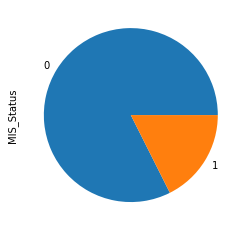

In [59]:
dataframe['MIS_Status'] = dataframe['MIS_Status'].replace({'P I F': 0, 'CHGOFF':1})
print(dataframe.MIS_Status.value_counts())
dataframe.MIS_Status.value_counts().plot.pie()

0    698834
1     97117
Name: LowDoc, dtype: int64


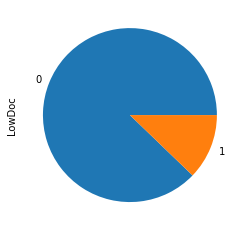

In [62]:
dataframe['LowDoc'] = dataframe['LowDoc'].replace({'[C, S, A, R, 1, 0]':np.nan})
dataframe['LowDoc'] = dataframe['LowDoc'].replace({'N': 0, 'Y':1})
dataframe['LowDoc'] = np.where((dataframe['LowDoc'] != 0) & (dataframe['LowDoc'] != 1), np.nan, dataframe.LowDoc)
print(dataframe.LowDoc.value_counts())
dataframe.LowDoc.value_counts().plot.pie()

0    605105
1    180024
Name: RevLineCr, dtype: int64


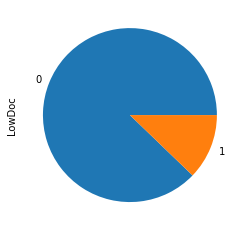

In [63]:
dataframe['RevLineCr'] = dataframe['RevLineCr'].replace({'N': 0, 'Y':1, })
dataframe['RevLineCr'] = dataframe['RevLineCr'].replace({'0': 0, '1':1, })
dataframe['RevLineCr'] = np.where((dataframe['RevLineCr'] != 0) & (dataframe['RevLineCr'] != 1), np.nan, dataframe.RevLineCr)
print(dataframe.RevLineCr.value_counts())
dataframe.LowDoc.value_counts().plot.pie()

0    574375
1    224424
Name: NewExist, dtype: int64


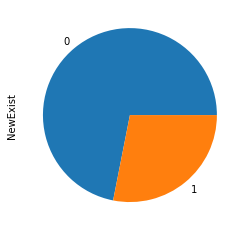

In [64]:
dataframe['NewExist'] = dataframe['NewExist'].replace({1.0: 0, 2.0:1, 0:np.nan}).fillna(0).astype(int)
print(dataframe.NewExist.value_counts())
dataframe.NewExist.value_counts().plot.pie()

1    419694
0    285243
2     93862
Name: UrbanRural, dtype: int64


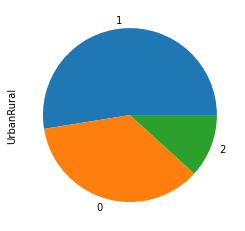

In [65]:
print(dataframe.UrbanRural.value_counts())
dataframe.UrbanRural.value_counts().plot.pie()

AxesSubplot(0.260833,0.125;0.503333x0.755)


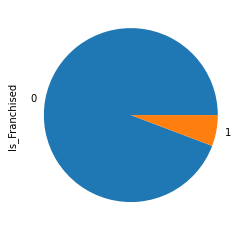

In [66]:
dataframe['FranchiseCode'] = dataframe['FranchiseCode'].replace(1,0 )	
dataframe['FranchiseCode'] = np.where((dataframe.FranchiseCode != 0 ),1,dataframe.FranchiseCode)

dataframe.rename(columns={"FranchiseCode": "Is_Franchised"}, inplace=True)
print(dataframe.Is_Franchised.value_counts().plot.pie())

0    558300
1    240499
Name: Is_CreatedJob, dtype: int64


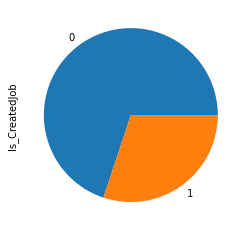

In [67]:
dataframe['CreateJob'] = np.where((dataframe.CreateJob > 0 ),1,dataframe.CreateJob)
dataframe.rename(columns={"CreateJob": "Is_CreatedJob"}, inplace=True)
print(dataframe.Is_CreatedJob.value_counts())
dataframe.Is_CreatedJob.value_counts().plot.pie()

1    408883
0    389916
Name: Is_RetainedJob, dtype: int64


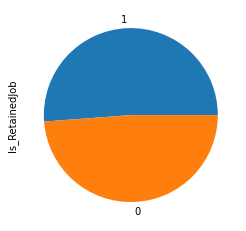

In [68]:
dataframe['RetainedJob'] = np.where((dataframe.RetainedJob > 0 ),1,dataframe.RetainedJob)
dataframe.rename(columns={"RetainedJob": "Is_RetainedJob"}, inplace=True)
print(dataframe.Is_RetainedJob.value_counts())
dataframe.Is_RetainedJob.value_counts().plot.pie()

In [69]:
ind_code = dataframe['NAICS']

#Function to take the first 2 digits of the code
def get_code(ind_code):
    if ind_code <= 0:
        return 0
    return (ind_code // 10 ** (int(math.log(ind_code, 10)) - 1))

#Convert 2 digits to sector name
def sector_name(i):
    def_code = {11:'Agriculture, Forestry, Fishing & Hunting', 21:'Mining, Quarying, Oil & Gas',
                22:'Utilities', 23:'Constuction', 31:'Manufacturing', 32:'Manufacturing', 33:'Manufacturing',
                42:'Wholesale Trade', 44:'Retail Trade', 45:'Retail Trade', 48:'Transportation & Warehousing',
                49:'Transportation & Warehousing', 51:'Information', 52:'Finance & Insurance', 
                53:'Real Estate, Rental & Leasing', 54:'Professional, Scientific & Technical Service',
                55:'Management of Companies & Enterprise', 
                56:'Administrative, Support, Waste Management & Remediation Service',
                61:'Educational Service', 62:'Health Care & Social Assistance',
                71:'Arts, Entertainment & Recreation', 72:'Accomodation & Food Service',
                81:'Other Servieces (Ex: Public Administration)', 92:'Public Administration'
               }
    if i in def_code:
        return def_code[i]
    
def def_rate(i):
    sector_default = {21:0.08, 11:0.09, 55:0.10, 
                      62: 0.10, 22:0.14, 
                      92:0.15,54:0.19, 
                      42:0.19,31:0.19,
                      32:0.16,33:0.14,
                      81:0.20,71:0.21,
                      72:0.22,44:0.22,
                      45:0.23,23:0.23,
                      56:0.24,61:0.24,
                      51:0.25,48:0.27,
                      49:0.23,52:0.28,53:0.29}
    if i in sector_default:
        return sector_default[i]
    return np.nan

In [70]:
#Create a new column i.e. ind_code
dataframe['ind_code'] = dataframe.NAICS.apply(get_code)

#Create a new column i.e. sector name
dataframe['Sector_name'] = dataframe.ind_code.apply(sector_name)

#Create a new column i.e.Sector_rate
dataframe['Sector_rate'] = dataframe.NAICS.apply(get_code).apply(def_rate)

In [71]:
dataframe[['NAICS','ind_code', 'Sector_rate', 'Sector_name']].head()

,NAICS,ind_code,Sector_rate,Sector_name
0,0,0,NaN,None
1,531210,53,0.29,"Real Estate, Rental & Leasing"
2,721110,72,0.22,Accomodation & Food Service
3,0,0,NaN,None
4,0,0,NaN,None


In [72]:
def_state = dataframe.groupby(['State', 'MIS_Status'])['State'].count().unstack('MIS_Status')
def_state['Def_Percent'] = def_state[1]/(def_state[1] + def_state[0])
def_state = def_state.drop(axis=1, columns=[0.0, 1.0]).round(1).to_dict()

#make the function change the area according to the default rate
def state_def_rate(i):
    def_state = {'AK': 0.1,'AL': 0.2, 'AR': 0.2, 'AZ': 0.2,'CA': 0.2, 'CO': 0.2, 'CT': 0.1, 'DC': 0.2,
                 'DE': 0.2, 'FL': 0.3, 'GA': 0.2, 'HI': 0.2, 'IA': 0.1, 'ID': 0.1, 'IL': 0.2, 'IN': 0.2, 
                 'KS': 0.1, 'KY': 0.2, 'LA': 0.2, 'MA': 0.1, 'MD': 0.2, 'ME': 0.1, 'MI': 0.2, 'MN': 0.1,
                 'MO': 0.2, 'MS': 0.2, 'MT': 0.1, 'NC': 0.2, 'ND': 0.1, 'NE': 0.1, 'NH': 0.1, 'NJ': 0.2,
                 'NM': 0.1, 'NV': 0.2, 'NY': 0.2, 'OH': 0.2, 'OK': 0.2, 'OR': 0.2, 'PA': 0.1, 'RI': 0.1,
                 'SC': 0.2, 'SD': 0.1, 'TN': 0.2, 'TX': 0.2, 'UT': 0.2, 'VA': 0.2, 'VT': 0.1, 'WA': 0.1,
                 'WI': 0.1, 'WV': 0.2, 'WY': 0.1}

    if i in def_state:
        return def_state[i]
    
#create a State_rate . column    
dataframe['State_rate'] = dataframe.State.apply(state_def_rate)

In [73]:
dataframe[['State', 'State_rate']].head(10)

,State,State_rate
0,WV,0.2
1,CA,0.2
2,AZ,0.2
3,CA,0.2
4,MS,0.2
5,ND,0.1
6,OR,0.2
7,NJ,0.2
8,CA,0.2
9,CA,0.2


In [74]:
dataframe['Portion_SBA_Bank'] = dataframe['SBA_Appv'] / dataframe['GrAppv']

In [75]:
dataframe['LowDoc'] = np.where((dataframe['LowDoc'] == np.nan) & (dataframe['DisbursementGross'] < 150000),1,dataframe.LowDoc)
dataframe['LowDoc'] = np.where((dataframe['LowDoc'] == np.nan) & (dataframe['DisbursementGross'] >= 150000),0,dataframe.LowDoc)

dataframe = dataframe[(dataframe['LowDoc'] == 0) | (dataframe['LowDoc'] == 1)]

dataframe.LowDoc.value_counts()

0    698834
1     97117
Name: LowDoc, dtype: int64

In [76]:
dataframe = dataframe.drop(axis=1, columns=['Bank','NAICS', 'BankState','ind_code'])

In [77]:
dataframe.dropna(subset=['City', 'State','LowDoc', 'MIS_Status', 
                    'Sector_rate', 'Sector_name', 'RevLineCr'], inplace=True)

In [78]:
# again check for missing values 
dataframe.isna().sum()

City                 0
State                0
Zip                  0
NoEmp                0
NewExist             0
Is_CreatedJob        0
Is_RetainedJob       0
Is_Franchised        0
UrbanRural           0
RevLineCr            0
LowDoc               0
DisbursementGross    0
BalanceGross         0
GrAppv               0
SBA_Appv             0
MIS_Status           0
Sector_name          0
Sector_rate          0
State_rate           0
Portion_SBA_Bank     0
dtype: int64

In [79]:
dataframe.Zip.value_counts()

90015    713
10001    684
90010    572
93401    528
33166    479
        ... 
22949      1
35231      1
32307      1
16749      1
98770      1
Name: Zip, Length: 29545, dtype: int64

In [80]:
### Drop use less features
dataframe =dataframe.drop(['City','Zip'],axis=1)

In [81]:
# label encoding the categorical features
cat_encoders = {}
le1 = LabelEncoder()
le1.fit(dataframe['State'])
dataframe['State'] = le1.transform(dataframe['State'])
cat_encoders['State'] = [le1,"le"]

#dataframe['Sector_name'] = le.fit_transform(dataframe['Sector_name'])

le2 = LabelEncoder()
le2.fit(dataframe['Sector_name'])
dataframe['Sector_name'] = le2.transform(dataframe['Sector_name'])
cat_encoders['Sector_name'] = [le2,"le"]

In [82]:
cat_encoders 

{'Sector_name': [LabelEncoder(), 'le'], 'State': [LabelEncoder(), 'le']}

In [83]:
# seperating the features from class label
X = dataframe.drop('MIS_Status',axis=1)
y = dataframe['MIS_Status']

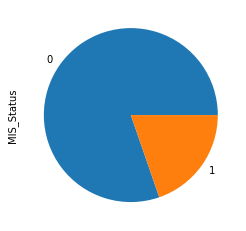

In [84]:
y.value_counts().plot.pie()

 The dataset is imbalanced we have to balance the dataset

In [85]:
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)
#X_scaled = pd.DataFrame(X_scaled,columns = X.columns)

In [ ]:
# balancing the dataset
print("Before OverSampling, counts of label '1': {}".format(sum(y == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y == 0)))

# Synthetic Minority Over Sampling Technique
sm = SMOTE(random_state=1)
X_over, y_over = sm.fit_resample(X, y)


print("After OverSampling, counts of label '1': {}".format(sum(y_over == 1)))
print("After OverSampling, counts of label '0': {} \n".format(sum(y_over == 0)))


print("After OverSampling, the shape of train_X: {}".format(X_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_over.shape))

Before OverSampling, counts of label '1': 119205
Before OverSampling, counts of label '0': 486002 



In [36]:
# split dataset for train and test
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.3)

# Machine Learning Models

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    dataframe_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1},
        index=[0],
    )

    return dataframe_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Random Forest Model

In [ ]:
# Fitting the model
rf_estimator = RandomForestClassifier(
    random_state=1
)  ## Complete the code to define random forest with random state = 1 and class_weight = balanced
rf_estimator.fit(
    X_train, y_train
)

In [ ]:
# confusion matrix for train data
confusion_matrix_sklearn(
    rf_estimator, X_train, y_train
)

In [ ]:
# Calculating different metrics for train data
rf_estimator_model_train_perf = model_performance_classification_sklearn(
    rf_estimator, X_train, y_train
)
rf_estimator_model_train_perf

In [ ]:
# confusion matrix for test data
confusion_matrix_sklearn(
    rf_estimator, X_test, y_test
)

In [ ]:
rf_estimator_model_test_perf = model_performance_classification_sklearn(
    rf_estimator, X_test, y_test
)  
rf_estimator_model_test_perf

# Logistic Regression Model

In [ ]:
lr_classifier = LogisticRegression() 
lr_classifier.fit(
    X_train, y_train
)  

In [ ]:
# confusion matrix for train data
confusion_matrix_sklearn(
    lr_classifier, X_train, y_train
)

In [ ]:
# Calculating different metrics for train data
lr_classifier_model_train_perf = model_performance_classification_sklearn(
    lr_classifier, X_train, y_train
)
lr_classifier_model_train_perf

In [ ]:
# confusion matrix for test data
confusion_matrix_sklearn(lr_classifier, X_test, y_test)

In [ ]:
# Calculating different metrics for train data
lr_classifier_model_test_perf = model_performance_classification_sklearn(
    lr_classifier, X_test, y_test
)
lr_classifier_model_test_perf

In [ ]:
# Feature Importance
feature_names = X.columns
importances = rf_estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [ ]:
import pickle
# saving model and encoders
log_reg_file = open("Log_reg_model.pkl", "wb")
rf_file = open("rf_model.pkl", "wb")
encoders_file = open("encoders.pkl", "wb")
pickle.dump(obj=lr_classifier, file=log_reg_file)
pickle.dump(obj=rf_estimator, file=rf_file)
pickle.dump(obj=cat_encoders, file=encoders_file)
log_reg_file.close()
encoders_file.close()